# Breast Cancer Prediction Portfolio

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Breast cancer is the cancer of cells in breast. Its the second most common cancer diagnosed among women in United States. It can occur both in Men and Women but its far more common among women. Worldwide breast cancer is the leading type of cancer in women, accounting for 25% of all cases.  Over the years, because of advancement in diagnosis and treatment, survival rate in breast cancer have increased and number of deaths associated with breast cancer have declined. The Most recent research has shown that the survival rate is 88% after 5 years of diagnosis and 80% after 10 years of
diagnosis.Early detection means using an approach that helps breast cancer get diagnosed earlier in the timeline before the disease becomes aggressive. Early detection of breast cancer can increase the rate of survival to a great extent, is easier to treat and reduces the mortality by 25%.
Breast cancer awareness and screening are the two main components which would aid in timely diagnosis of breast cancer and treatment. 

In the last few years, Machine Learning has been bringing revolutionary change in the field of  cancer diagnosis. Whether the disease be in very initial stage or in the late stage, ML techniques could  map the symptoms and their stages to the diagnosis of disease. This system is called Computer-Aided Detection (CADe) or computer-aided diagnosis (CADx) and is based on Digital imaging and Radiology. Such systems are used in addition to the human evaluation of the diagnosis. These system  helps doctors to take decisions swiftly with  improved  accuracy of radiologists with a reduction of time in the interpretation of images.  

Generally, ultrasound CADs system for breast cancer detection involves four stages, 1. Image preprocessing 2. Image Segmentation 3. Feature Extraction 4. Classification.  In this provided dataset, the data is already classified and  each column of the dataset represents the feature of the tumorous tissue and each row represents each instances. 
 
Here, we used Machine learning algorithms to identify the set of categories a new observations map to on the basis of a training set of data which contain labelled categories. This explores the construction and study of algorithms that can learn from and make predictions on data. Using this dataset in the classifier, objective is to identify whether the breast cancer diagnosis is benign or malignant. More specifically aiming to address following questions,

1. How do benign and malignant tumor cells differ in their sizes?

2. Do the symmetry and texture of tumor cells have any role in their malignancy?

3. What is the accuracy of these models in diagnosing breast cancer tumors ?

This dataset is taken from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

The breast cancer database was obtained from the University of Wisconsin Hospital and it contains 569 instances and 32 variables.  

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

 a) radius (mean of distances from center to points on the perimeter)
 
 b) texture (standard deviation of gray-scale values)
 
 c) perimeter
 
 d) area
 
 e) smoothness (local variation in radius lengths)
 
 f) compactness (perimeter^2 / area - 1.0)
 
 g) concavity (severity of concave portions of the contour)
 
 h) concave points (number of concave portions of the contour)
 
 i) symmetry
 
 j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For example, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.




In [60]:
#import your libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


#etc

#your info here
#__author__ = Jaya Sharma
#__email__ = reply2jaya@gmail.com

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [61]:
#load the data into a Pandas dataframe
df = pd.read_csv('data.csv')

### ---- 3 Clean the data ----

In [62]:
#to see the overview of column names and row structure
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [63]:
#dataset is composed of 32 columns and 569 rows
df.shape

(569, 32)

In [64]:
#descriptive statisctics of the categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [65]:
#column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [66]:
#checking if the dataset is imbalanced
df.diagnosis.value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### Observations:
1. The data has 569 rows and 32 columns.
2. There are 31 numerical features (30 float types and 1 int) and 1 categorical.
3. diagnosis is the target variable.
4. There are no features with null values and there are no duplicated records.



### ---- 4 Explore the data (EDA) ----

In [67]:
#statistical analysis of dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [68]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [69]:
#looking for duplicated rows in the dataset
df.duplicated().sum()

0

In [70]:
#checking for unique values in training data
df.nunique().sort_values(ascending = False)

id                         569
smoothness_se              547
fractal_dimension_se       545
area_worst                 544
concave points_mean        542
compactness_se             541
radius_se                  540
area_mean                  539
concavity_worst            539
compactness_mean           537
concavity_mean             537
fractal_dimension_worst    535
concavity_se               533
perimeter_se               533
compactness_worst          529
area_se                    528
perimeter_mean             522
texture_se                 519
perimeter_worst            514
texture_worst              511
concave points_se          507
symmetry_worst             500
fractal_dimension_mean     499
symmetry_se                498
concave points_worst       492
texture_mean               479
smoothness_mean            474
radius_worst               457
radius_mean                456
symmetry_mean              432
smoothness_worst           411
diagnosis                    2
dtype: i

This dataset is pretty clean and no cleaning is required. Dataset will be explored to understand the relationship between dependent variables and independent variables.

The ratio of Benign and Malignant diagnosis is 2:1, hence imbalance effect does not need to be addressed.

357 212


C:\Users\jayash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


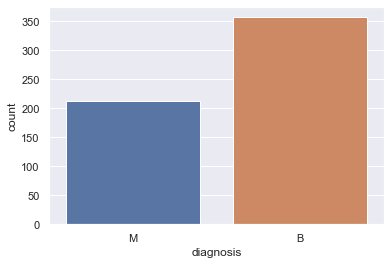

In [71]:
#looking at distribution of cancer diagnosis
ax = sns.countplot(df['diagnosis'],label='Count')
b,m = df['diagnosis'].value_counts()
print(b,m)

In [72]:
#dropping ID columns for our analysis
df.drop('id',axis =1, inplace = True)

In [73]:
y = df['diagnosis']
df = df.drop(['diagnosis'], axis =1)

In [74]:
#looking at the features, we see features are describing mean, SE and worst values. Hence categorizing into three categories for easier analysis.
features_mean = list(df.columns[:10])
features_se= list(df.columns[10:20])
features_worst = list(df.columns[20:31])

In [75]:
print(features_mean)
print(features_se)
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


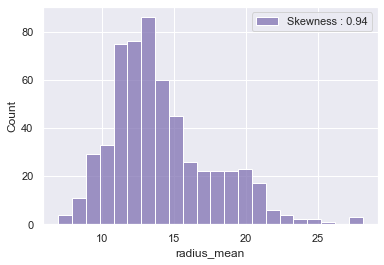

In [76]:
#Studying the distribution of independent variables
g = sns.histplot(df['radius_mean'], color = 'm',label = 'Skewness : %.2f'%(df['radius_mean'].skew()))
g = g.legend(loc = 'best')


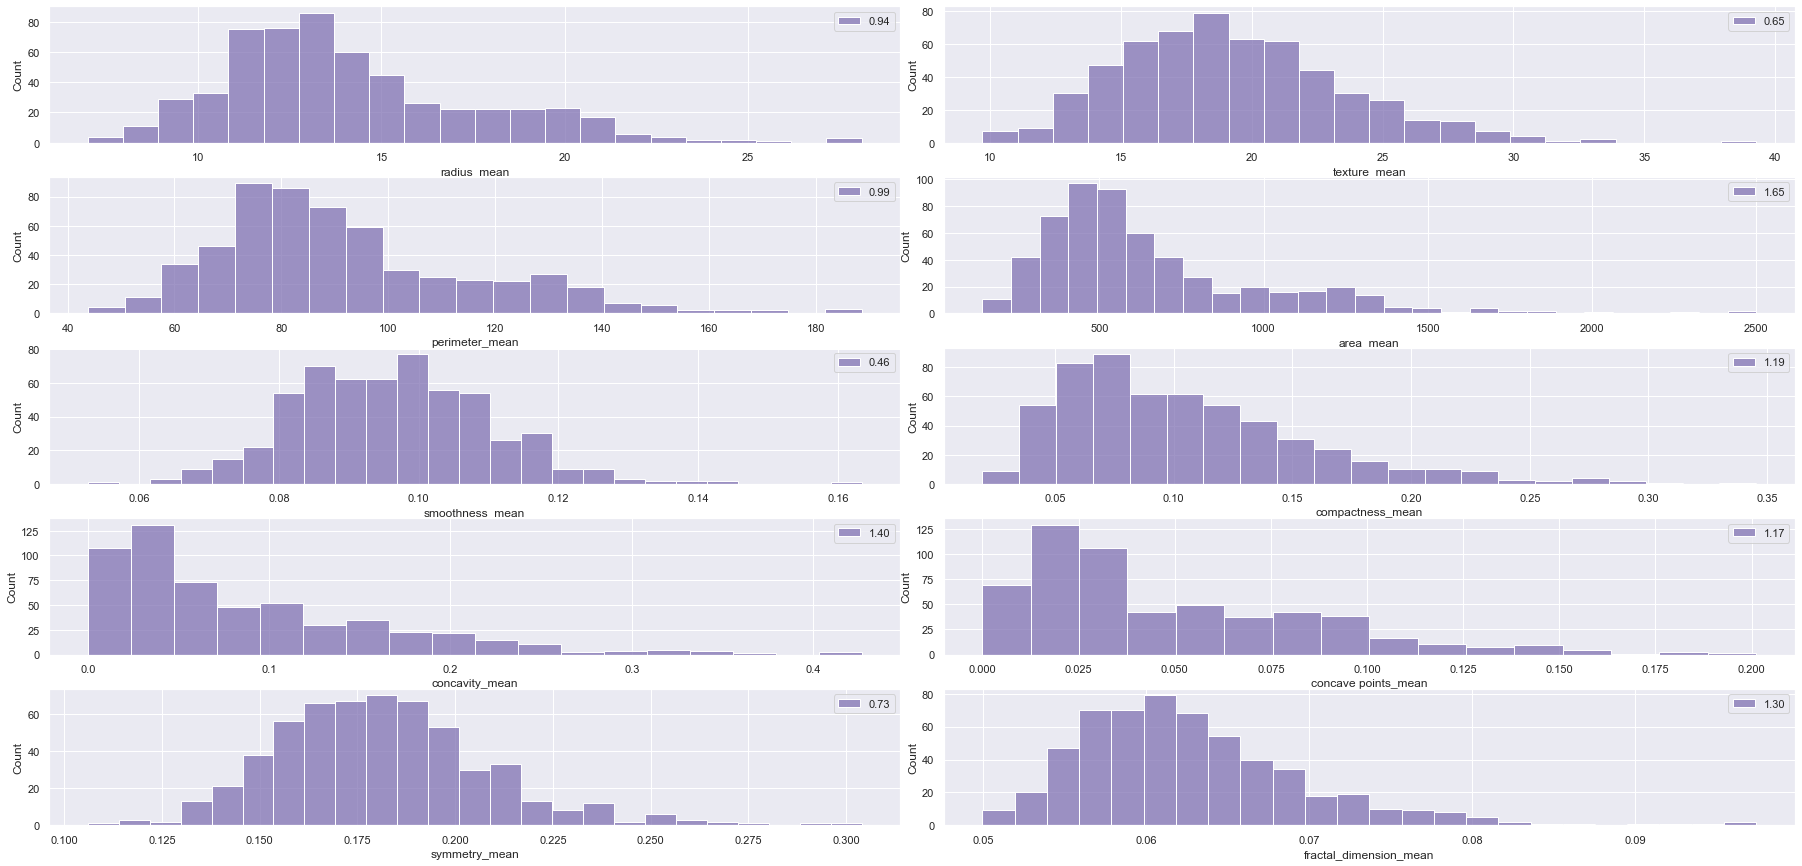

In [77]:
num_rows,num_cols = 5,2

fig, axes = plt.subplots(num_rows,num_cols,figsize = (25, 12))
fig.tight_layout()

for index, column in enumerate(df[features_mean].columns):
    i,j = (index//num_cols, index%num_cols)
    g = sns.histplot(df[column],color = 'm', label = '%.2f'%(df[column].skew()),ax=axes[i,j])
    g = g.legend(loc = 'best')
                


We see, some of the variables are little skewed than others.

 ###  How do benign and malignant tumor cells differ in their sizes?

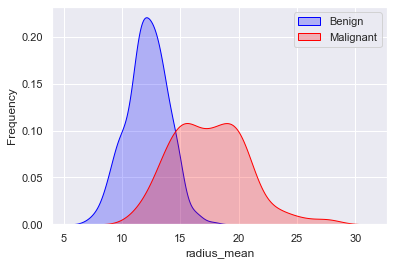

In [78]:
#Independent Variables: Kernel Density estimation
g = sns.kdeplot(df['radius_mean'][(y == 'B')], color = 'Blue', shade = True)
g = sns.kdeplot(df['radius_mean'][(y == 'M')], ax = g, color = 'Red', shade = True)
g.set_xlabel('radius_mean')
g.set_ylabel('Frequency')
g = g.legend(['Benign', 'Malignant'])

###  Do the symmetry and texture of tumor cells vary among different diagnosis?

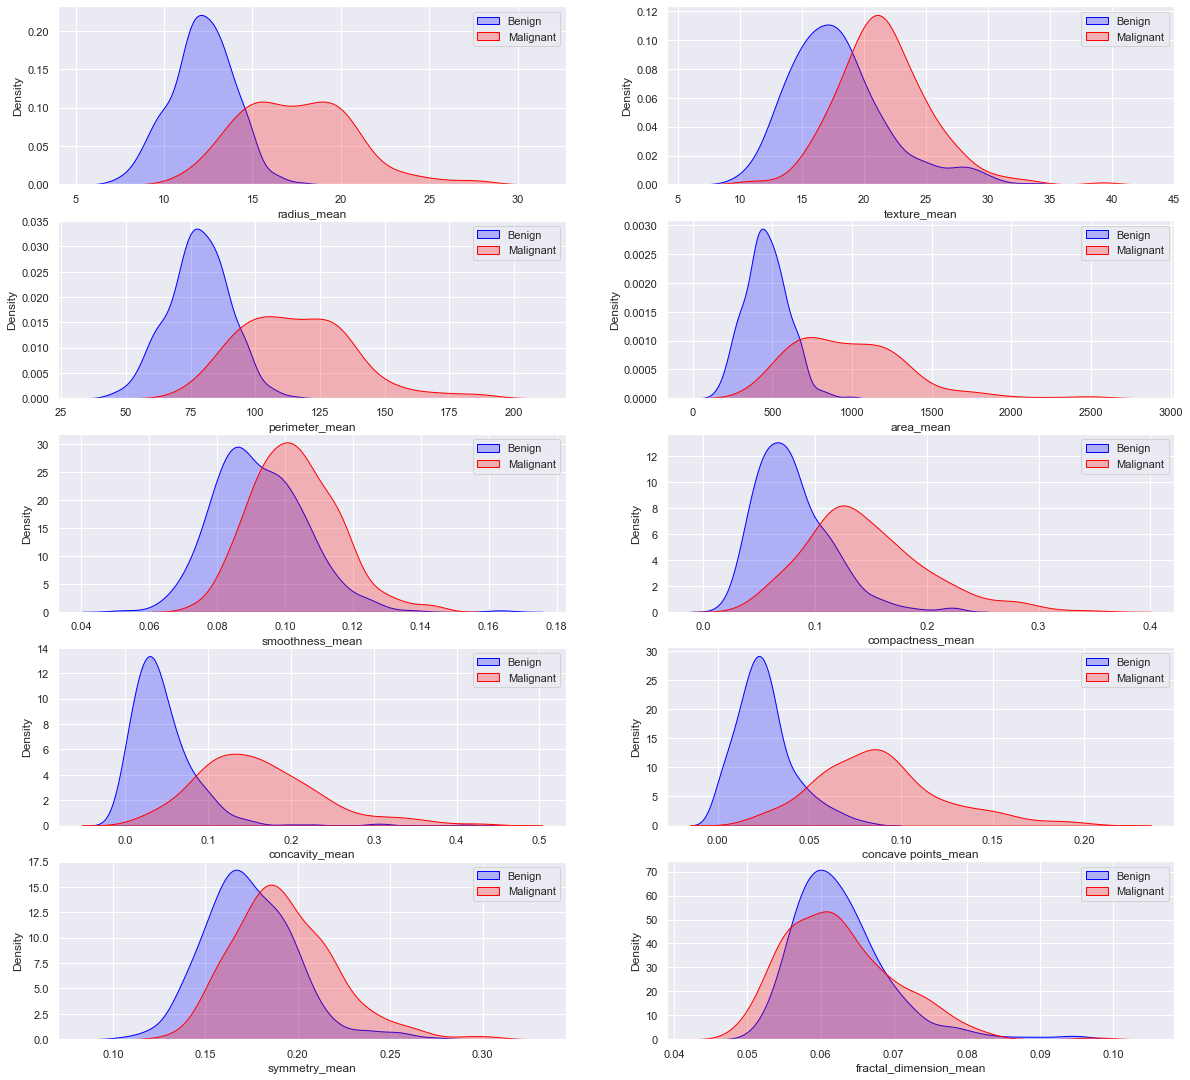

In [167]:
#Kernel Density Estimation for other variables

# Creating the plots
features = [ 'radius_mean','texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

labels = ["Benign", "Malignant"]

def creating_plots(features, labels):
    
    '''Takes in a number of features and labels and returns subplots.'''
   
    plt.figure(figsize=(20,19))
    for feature in features:
        plt.subplot(5, 2, features.index(feature)+1)
        sns.kdeplot(df[feature][(y == 'B')], label = labels[0], shade = True, color = 'Blue')
        sns.kdeplot(df[feature][(y == 'M')], label = labels[1], shade = True, color = 'Red')
        plt.legend()   

creating_plots(features, labels)   

## Observations:

###  For  variables describing tumor cells dimensions (like mean of cell radius, perimeter, area etc.), large sized cells were more often seen in malignant cases and smaller sizes in benign cases suggesting that cells in malignant diagnosis tend to be larger.



 ### Mean of smoothness, symmetry, texture and fractal dimension of cells did not show specific preference for one diagnosis than to another. 




<AxesSubplot:>

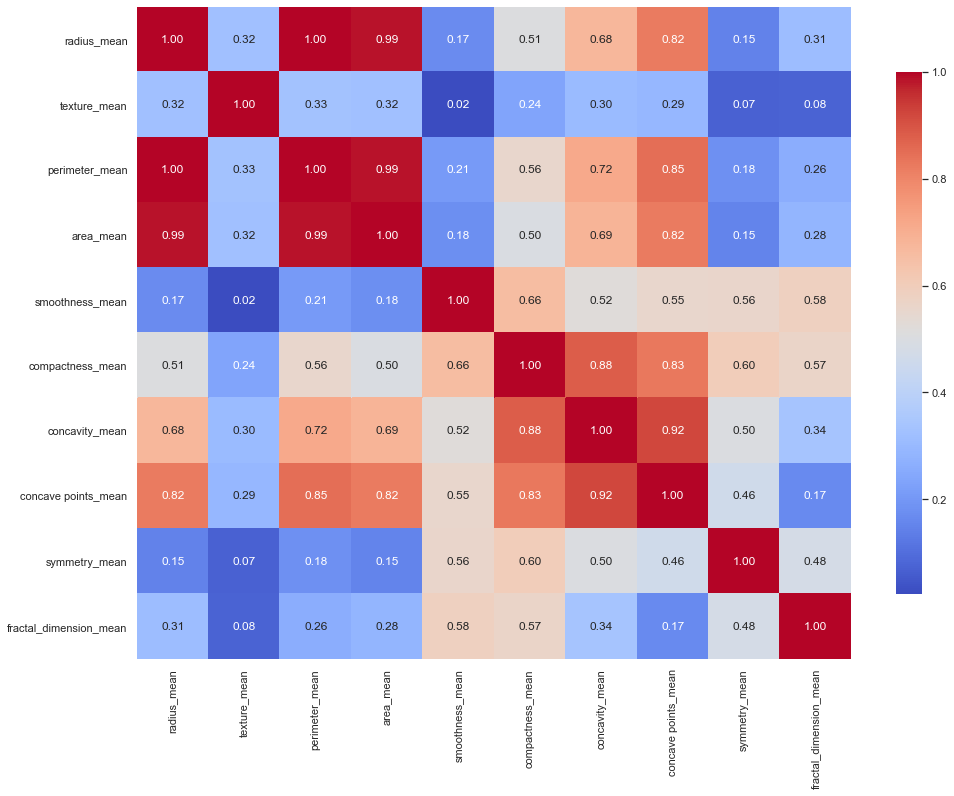

In [484]:
#look for correlation between each feature and the target
#look for correlation between features
sns.set(rc={'figure.figsize':(16,12)})
corr = df[features_mean].corr().abs()
sns.heatmap(corr, annot = True, fmt =".2f", cmap = 'coolwarm', cbar_kws = {"shrink" : .8})


<AxesSubplot:>

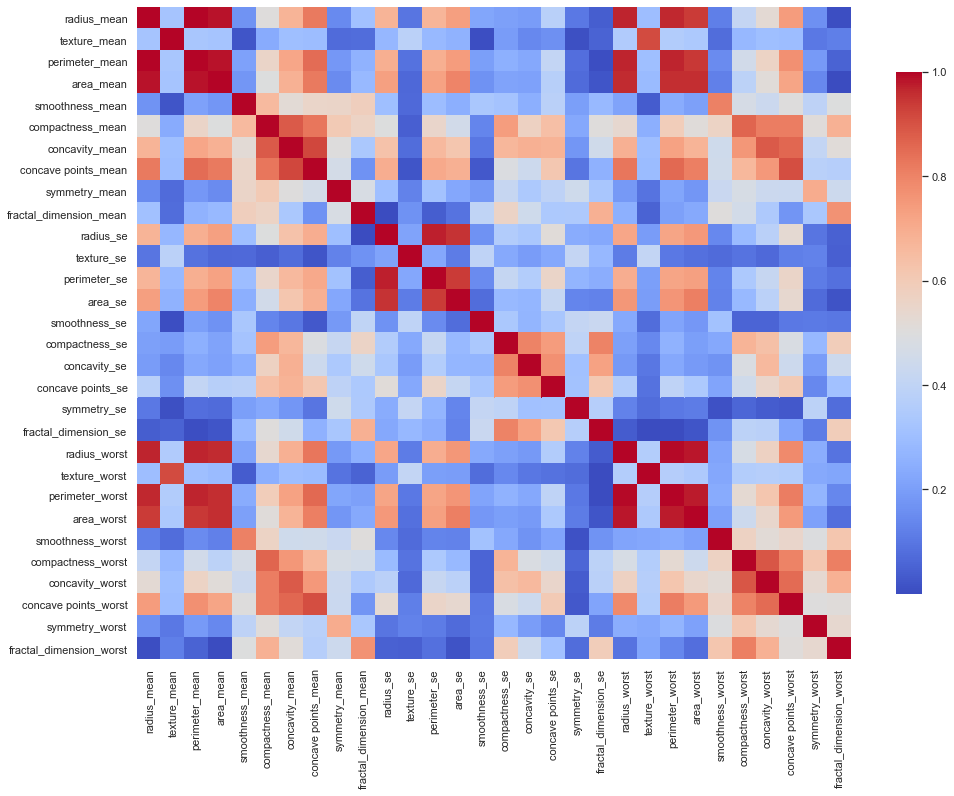

In [485]:
corr = df.corr().abs()
sns.heatmap(corr, annot = False, fmt =".2f", cmap = 'coolwarm', cbar_kws = {"shrink" : .8})


In [486]:
# Selecting upper triangle of correlation matrix
upper_tri = corr.where(np.triu(np.ones(corr.shape),
                                  k=1).astype(np.bool))

# Finding index of feature columns with correlation greater than 0.95
full_set_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('Features to drop: {}'.format(full_set_to_drop))

Features to drop: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


As we were comparing all the variables in the dataset, we  found  several features were correlated. 
These were some correlated variables. And we dropped :['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst'].

In [487]:

df = df.drop(['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst'],axis = 1)

In [530]:
y = y.map({'M':1,'B':0})
#split training data
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 5)

## What is the accuracy of these models in diagnosing breast cancer tumors ?
To address this question, we trained different models on train data, then evaluated in test data as follows.

## Part 3 - DEVELOP

### ---- 5 Establish a baseline ----


After splitting training and test dataset we created machine learning model in training set and then tested in test dataset. Following models were used.
1. Logistic Regression : Easier and simpler and very efficient to train.
2. Logistic Regression with Hyperparameter tunning.
3. Random Forest Classifier  : Random forest is robust, accurate, efficient and relatively quick to develop.


### Baseline - Logistic Regression

In [531]:
#for baseline model logistic regression with default parameters was chosen and evaluated.

lr_baseline=LogisticRegression().fit(x_train,y_train)

C:\Users\jayash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [532]:
predict_lgr = lr_baseline.predict(x_test)
predict_lgr

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [533]:
# Print Confusion Matrix for baseline Logistic Regression model
cmlr_baseline = metrics.confusion_matrix(y_test, predict_lgr)

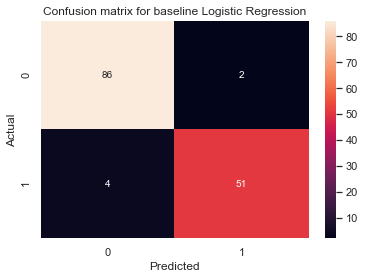

In [534]:
#Visualizing confusion matrix and evaluating model using confusion matrix and accuracy.
sns.heatmap(cmlr_baseline, annot=True)
plt.title("Confusion matrix for baseline Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

True Negative:
True negative represents the value of correct predictions of negatives out of actual negative cases. 51 diagnosis were correctly precticted as Benign.

True Positive:
True positive represents the value of correct predictions of positives out of actual positive cases. 86 diagnosis were correctly precticted as Malignant.

False Negative:
False negative represents the value of incorrect negative predictions. 4 diagnosis were incorrectly predicted as benign when they were actually malignant.

False Positive:
False positive represents the value of incorrect positive predictions. 2 diagnosis were incorrectly predicted as malignant when they were actually benign.

In [535]:
#The classification report for baseline Logistic regression model
print ("\n\n ---Logistic Regression Model---") 
print(metrics.classification_report(y_test, predict_lgr,target_names = ['0 No Death', '1 Death ']))



 ---Logistic Regression Model---
              precision    recall  f1-score   support

  0 No Death       0.96      0.98      0.97        88
    1 Death        0.96      0.93      0.94        55

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



The accuracy of baseline model was 96%. As this baseline model prediction was simply based on default parameters without model tuning, next we did Hyperparameter tuning and cross validation to improve the model scores before selecting the final best model.

## Logistic Regression - with Hyperparameter tuning

In [536]:
#Creating parameters for logistic regression Hyperparameter tuning
#create logistic regression

parameters_lr = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'penalty':['none','l1','l2','elasticnet'],
                      'C':[1,2,3,4,5,0.01,0.1]}
lr = LogisticRegression()

In [537]:
#Finding the best parameters through Grid search
#create  grid search using 7 fold cross validation

grid = GridSearchCV(lr, parameters_lr, cv=7,  n_jobs=-1)

#conduct and fit grid search
Logistic_best = grid.fit(x_train, y_train)

In [538]:
#View Hyperparameter Values Of Best Model
print("The best hyper parameters for Logistic regression are: {}".format(Logistic_best.best_params_))
print("The cross val score using the best hyper parameters for  Logistic regression is: {}".format(Logistic_best.best_score_))

The best hyper parameters for Logistic regression are: {'C': 4, 'penalty': 'l2', 'solver': 'newton-cg'}
The cross val score using the best hyper parameters for  Logistic regression is: 0.9622170179547229


In [539]:
#Fitting the best parameters for logistic regression
Logistic_best.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 0.01, 0.1],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [540]:
# predictions of target vector by logistic model
predict_lr = Logistic_best.predict(x_test)
predict_lr

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [541]:
# Print Confusion Matrix for Logistic Regression model
cm = metrics.confusion_matrix(y_test, predict_lr)

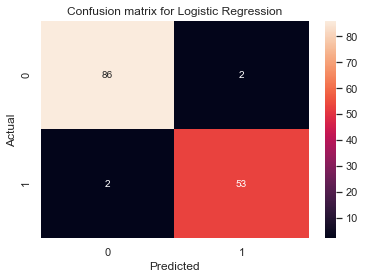

In [542]:
#Visualizing confusion matrix
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix for Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [543]:
#The classification report for Logistic regression model
print ("\n\n ---Logistic Regression Model---") 
print(metrics.classification_report(y_test, predict_lr,target_names = ['0 No Death', '1 Death ']))



 ---Logistic Regression Model---
              precision    recall  f1-score   support

  0 No Death       0.98      0.98      0.98        88
    1 Death        0.96      0.96      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Precision:
Model Precision score is model's ability to correctly predict the actual positives out of all positive predictions made. Mathmatically its represented as: Precision = True Positive/(True Positive + False Positive)

Recall:
Model Recall score is model's ability to correctly predict the positives out of actual positives. Mathmatically its represented as: Recall = True Positive/(True Positive + False Negative)

F1 score:
Model's F1 score is a function of precision and recall score. This is considered very useful measure in the scenarios where we try to optimize either precision or recall score and as a result, the model performance suffers. In our case, optimizing for precision helps with correctness if the diagnosis is malignant. However this comes at the cost of missing malignant diagnosis more frequently (high False Negatives).

Optimizing for recall helps with minimizing the chance of missing malignant diagnosis. However, this comes at the cost of predicting diagnosis malignant even though diagnosis is benign (a high number of FP).

Mathmatically its represented as: F1 Score = 2 Precision Score Recall Score/ (Precision Score + Recall Score)

F1-score is harmonic mean of precision and recall score and is used as a metrics in the conditions where choosing either the precision score or recall score results in compromise giving high false positives and false negatives respectively.

Accuracy:
Model accuracy score is model's ability to correctly predict both the positives and negatives out of all predictions. Mathmatically its represented as: Accuracy Score = (True Positive + True Negative)/ (TP + FN + TN + FP)

In our Logistic Regression model, we saw 2 diagnosis are false positives (predicted to be malignant when they are benign) and 2 are false negatives (predicted benign when they are malignant).

Confusion matrix for Logistic Regression model showed 2 false positive cases and accuracy of 97%.

## Random Forest

In [544]:
#Create hyperparameters for random forest hyperparameter tuning
parameters_rf={
    'n_estimators':np.arange(100,1000,100),
    'max_features' : ['auto','sqrt'],
    'min_samples_split':np.arange(2,10),
    'min_samples_leaf':np.arange(1,10),
    'criterion':['gini', 'entropy'],
   
}

In [545]:
#create Random forest 
rf = RandomForestClassifier()

In [546]:
#Finding the best parameters through Grid search
#create  grid search using 3 fold cross validation

grid_RF = GridSearchCV(rf, parameters_rf, cv=3,  n_jobs=-1)

#conduct and fit grid search
RF_best = grid_RF.fit(x_train, y_train)

In [547]:
#View best Hyperparameter Values Of Random Forest
print("The best hyper parameters for Random Forest are: {}".format(RF_best.best_params_))
print("The cross val score using the best hyper parameters for  Random Forest is: {}".format(RF_best.best_score_))

The best hyper parameters for Random Forest are: {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}
The cross val score using the best hyper parameters for  Random Forest is: 0.960093896713615


In [548]:
#Fitting the best parameters for Random Forest
RF_best.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [549]:
# predictions of target vector by Random forest
predict_RF = RF_best.predict(x_test)
predict_RF

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [550]:
#printing confusion matrix for Random forest
cm_RF = metrics.confusion_matrix(y_test, predict_RF)

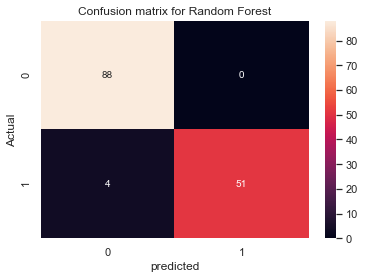

In [551]:
#Visualizing confusion matrix for Random forest
sns.heatmap(cm_RF, annot = True)
plt.title('Confusion matrix for Random Forest')
plt.ylabel('Actual')
plt.xlabel('predicted')
plt.show()

In [552]:
print(metrics.classification_report(y_test, predict_RF, target_names = ['No Death 0', 'Death 1']))

              precision    recall  f1-score   support

  No Death 0       0.96      1.00      0.98        88
     Death 1       1.00      0.93      0.96        55

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



Confusion matrix for Random Forest showed 4 False negatives and 0 false positives. Accuracy and Precision of this model is really high at 97% and 100% respectively, however this comes with low  recall value. Model which predicts the diagnosis as benign  when it is malignant with that recall value is not preferred. 

## Model Evaluation

In [564]:
#best model selected
Best_model = LogisticRegression(C= 4, penalty= 'l2', solver= 'newton-cg')

In [565]:
Best_model

LogisticRegression(C=4, solver='newton-cg')

In [566]:
Best_model.fit(x_train, y_train)

LogisticRegression(C=4, solver='newton-cg')

In [568]:
y_pred = Best_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.972027972027972

In [569]:
print('Accuracy score for Logistic Regression was: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy score for Logistic Regression was: 0.972027972027972


In [570]:
print(metrics.classification_report(y_test, y_pred, target_names = ['Benign 0', 'Malignant 1']))

              precision    recall  f1-score   support

    Benign 0       0.98      0.98      0.98        88
 Malignant 1       0.96      0.96      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



## Summary:
In machine learning our goal is to minimize Type I (FP) and Type II errors(FN).In an ideal case, a perfect model should have none of these errors. However this is not possible in real world and we have to balance between precision and recall. Even though, in the models we have tested, Accuracy was 97% in both Random Forest and Logistic Regression, Logistic Regression was choosen as a best model because of its better Recall value. Still, there were 2 False negative predictions in our best prediction which was lower than in Random Forest. In this scenario, we prefer a model which would minimize false negatives hence helping us to not miss cancers which require intensive treatment as soon as they are diagnosed. With our Logistic Regression we had 97% accuracy and 96% recall. 